---
# DATA IMPORTING
---

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
print(fetch_california_housing()["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [42]:
# data splitting
X_train_full, X_test, y_train_full, y_test = train_test_split(fetch_california_housing()["data"], fetch_california_housing()["target"], train_size = 0.8, random_state = 42)

# data normalization
mean, std = np.mean(X_train_full, axis = 0), np.std(X_train_full, axis = 0)
X_train_full, X_test = (X_train_full - mean)/std, (X_test - mean)/std

In [37]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [ ]:
# data normalization
mean, std = np.mean(X_train_full, axis = 0), np.std(X_train_full, axis = 0)
X_train_full, X_test = (X_train_full - mean)/std, (X_test - mean)/std

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, train_size = 0.75, random_state = 42)

In [30]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((12384, 8), (12384,), (4128, 8), (4128,))

---
# Model construction
---

In [51]:
# import libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
tf.random.set_seed(42)

# model creating function
def create_model() :
    model = tf.keras.Sequential([
        Dense(50, activation = "relu", input_shape = (8, )),
        Dense(50, activation = "relu"),
        Dense(50, activation = "relu"),
        Dense(1)
    ])

    model.compile(optimizer = optimizers.Adam(learning_rate = 0.005), loss = "mse", metrics = ["RootMeanSquaredError"])

    plot_model(model, to_file = "model_california_housing.png", show_shapes = True)

    return model

In [57]:
model = create_model()
history = model.fit(X_train, y_train, epochs = 40, validation_data = (X_val, y_val))

c:\Users\natha\Documents\Programmation\GitHub\Deep Learning with Keras & TensorFlow book\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - RootMeanSquaredError: 35.1027 - loss: 1681.7247 - val_RootMeanSquaredError: 1.1015 - val_loss: 1.2134
Epoch 2/40
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - RootMeanSquaredError: 1.0734 - loss: 1.1536 - val_RootMeanSquaredError: 0.9831 - val_loss: 0.9665
Epoch 3/40
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - RootMeanSquaredError: 1.0034 - loss: 1.0075 - val_RootMeanSquaredError: 0.9599 - val_loss: 0.9214
Epoch 4/40
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - RootMeanSquaredError: 0.9496 - loss: 0.9056 - val_RootMeanSquaredError: 3.8468 - val_loss: 14.7982
Epoch 5/40
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - RootMeanSquaredError: 2.2584 - loss: 5.3647 - val_RootMeanSquaredError: 0.9790 - val_loss: 0.9584
Epoch 6/40
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - RootMeanSquaredError: 1.1635 - loss: 1.3598 - val_RootMeanSquaredError: 5.3260 - val_loss: 28.3659
Epoch 7/40
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - RootMeanSquare

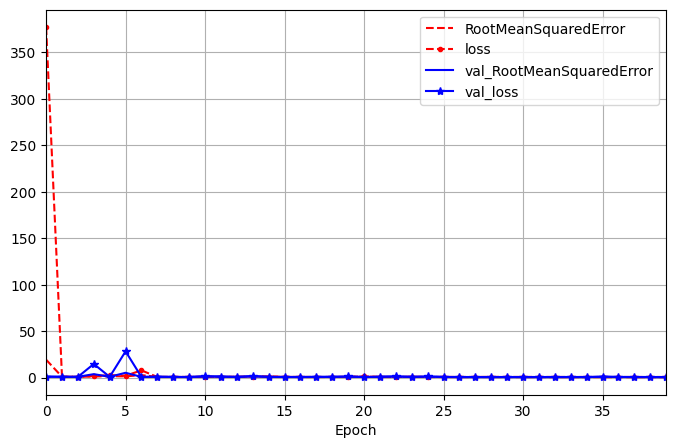

In [59]:
# history plotting
pd.DataFrame(history.history).plot(figsize = (8, 5), xlim = [0, 39], grid = True, xlabel = "Epoch", style = ["r--", "r--.", "b-", "b-*"])
plt.show()